# Seed-voxel functional connectivity

## Load libraries

In [1]:
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

## Load data

In [2]:
# Load fMRI data

dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]


Dataset created in C:\Users\Iga/nilearn_data\development_fmri


Dataset created in C:\Users\Iga/nilearn_data\development_fmri\development_fmri



Downloaded 16041 of 16041 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 68285 of 68285 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 5642698 of 5642698 bytes (100.0%,    0.0s remaining) ...done. (4 seconds, 0 min)


## Create a seed

In [3]:
pcc_coords = [(0, -52, 18)]
seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=8,
    detrend=True, standardize=True)

## Extract timeseries from a seed

In [4]:
seed_timeseries = seed_masker.fit_transform(func_filename,
                                             confounds=confounds_filename)
seed_timeseries = np.squeeze(seed_timeseries)

## Estract timeseries from the whole brain

In [5]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=8,
    detrend=True, standardize=True,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_timeseries = brain_masker.fit_transform(func_filename,
                                               confounds=confounds_filename)

In [7]:
# Print shape of seed time-series

print(seed_timeseries.shape)

# Print shape of brain time-series

print(brain_timeseries.shape)


(168,)
(168, 32504)


## Calculate seed to voxel correlations

In [11]:
# The dot product of the two arrays will give us correlation 
seed_to_voxel_correlations = (np.dot(brain_timeseries.T, seed_timeseries) /
                              seed_timeseries.shape[0])

In [12]:
# Calculate Pearson product-moment correlation coefficient between seed and all voxel trime-series
from scipy import stats

corr_map = np.zeros(brain_timeseries.shape[1])

for i in range(brain_timeseries.shape[1]):
    corr_map[i] = stats.pearsonr(seed_timeseries, brain_timeseries[:,i])[0]

## Plot correlation using statistical map plot

NameError: name 'plt' is not defined

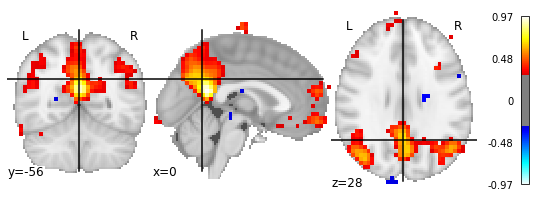

In [21]:
seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)

# Plot correlation map using plot_stat_map

plotting.plot_stat_map(seed_to_voxel_correlations_img, threshold=0.3)
plt.show()

# Add seed ROI marker with display.add_markers()

display.add_markers(pcc_coords, marker_color = "g")
plt.show()